
# Sécurité dans les réseaux et protection de contenus audio-visuels
## Membre

| Prénom   |      NOM      |  Nombre etudiant |
|----------|:-------------:|------:|
| Duong Phuc Tai |  NGUYEN | 12108339 |
| Kamilia |    RAHIL   |   12109923 |

## TP3 – SPREAD SPECTRUM WATERMARKING
1. Off-the-shell random number generators - principles
4. Conclusion

### Importing necessary libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

## criteria library
from sklearn.metrics import mean_squared_error as compute_mse
from skimage.metrics import peak_signal_noise_ratio as compute_psnr
from skimage.metrics import structural_similarity as compute_ssim


In [2]:
## set the necessary path

_DATA = './data'
_RESULT = './result'

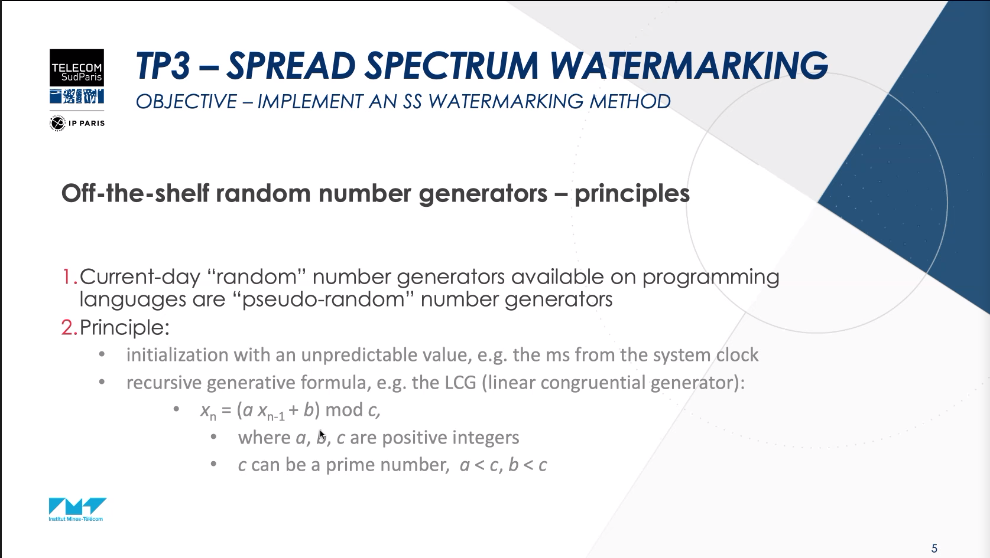
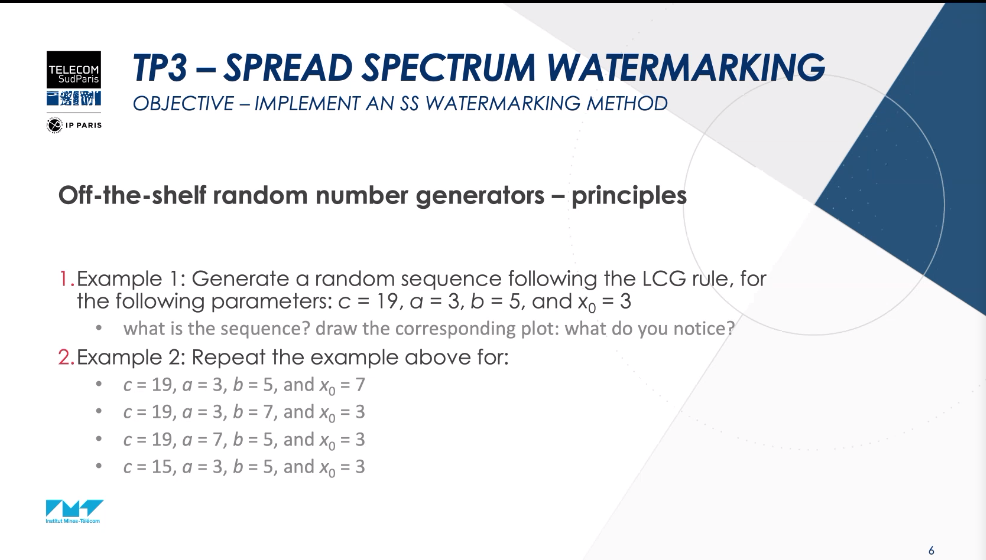

In [3]:
def lcg(c, a, b, x0):
    x = np.zeros(c)
    x[0] = x0
    for i in range(1,c):
        x[i] = np.mod((a*x[i-1] + b), c)
    return x

[ 3. 14.  9. 13.  6.  4. 17. 18.  2. 11.  0.  5.  1.  8. 10. 16. 15. 12.
  3.]


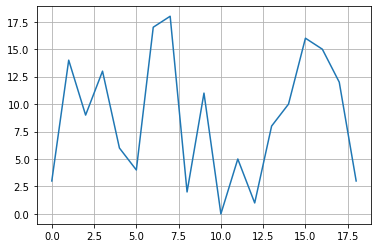

In [4]:
seq_rand = lcg(c=19, a=3, b=5, x0=3)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

[7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]


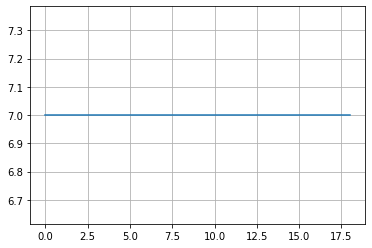

In [5]:
seq_rand = lcg(c=19, a=3, b=5, x0=7)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

[ 3. 16. 17.  1. 10. 18.  4.  0.  7.  9. 15. 14. 11.  2. 13.  8. 12.  5.
  3.]


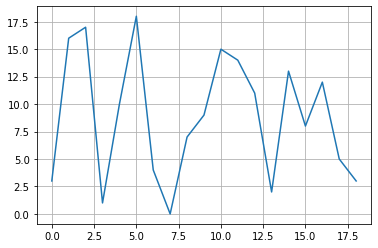

In [6]:
seq_rand = lcg(c=19, a=3, b=7, x0=3)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

[ 3.  7. 16.  3.  7. 16.  3.  7. 16.  3.  7. 16.  3.  7. 16.  3.  7. 16.
  3.]


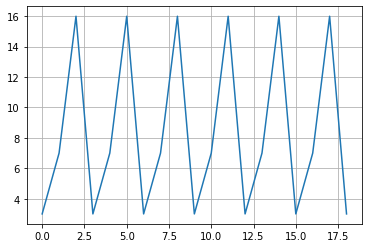

In [7]:
seq_rand = lcg(c=19, a=7, b=5, x0=3)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

[ 3. 14.  2. 11.  8. 14.  2. 11.  8. 14.  2. 11.  8. 14.  2.]


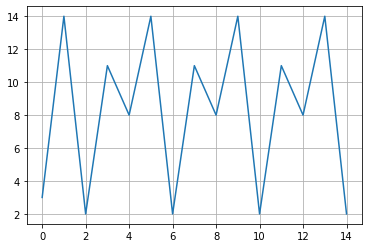

In [8]:
seq_rand = lcg(c=15, a=3, b=5, x0=3)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

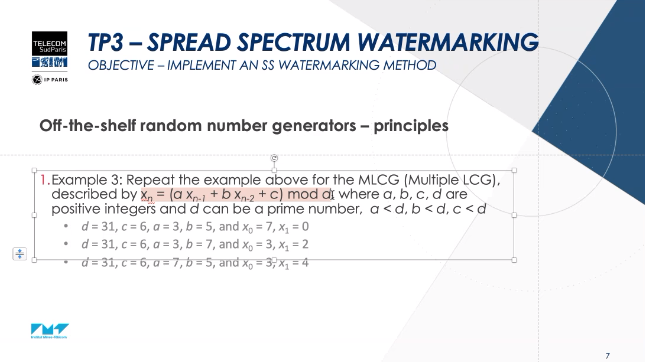

In [9]:
def mlcg(d, c, a, b, x0, x1):
    x = np.zeros(d)
    x[0] = x0
    x[1] = x1
    for i in range(1,d):
        x[i] = np.mod((a*x[i-1] + b*x[i-2] + c), d)
    return x

[ 7. 27. 29. 11. 29. 24.  6. 20.  3. 22. 25.  5. 22.  4.  4.  7. 16. 27.
 12. 22.  8. 16.  1. 27. 30. 14. 12. 19. 30.  5. 16.]


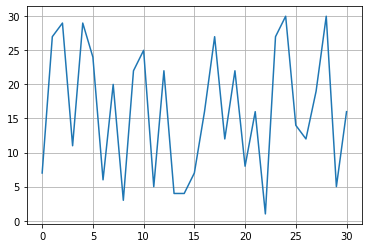

In [10]:
seq_rand = mlcg(d=31, c=6, a=3, b=5, x0=7, x1=0)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

[ 3. 15. 10. 17.  3. 10. 26. 30. 30. 27. 18.  1. 11. 15.  4. 30.  0. 30.
  3.  8. 20. 29. 16.  9. 21.  8. 22.  4. 17. 23.  8.]


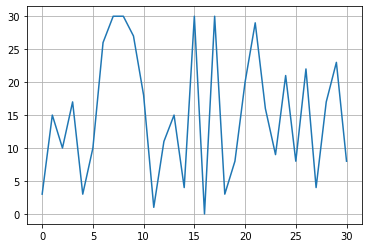

In [11]:
seq_rand = mlcg(d=31, c=6, a=3, b=7, x0=3, x1=2)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

[ 3. 27. 24. 30. 26. 28. 22. 21. 15. 30. 12. 23. 10.  5. 29. 17. 22. 28.
  2.  5. 20. 16.  1.  0. 11. 21. 22. 17. 18.  0.  3.]


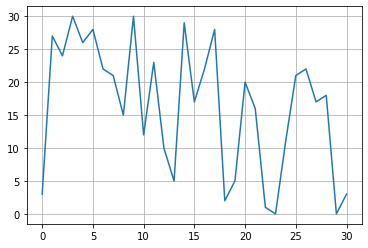

In [12]:
seq_rand = mlcg(d=31, c=6, a=7, b=5, x0=3, x1=4)
print(seq_rand)
plt.plot(seq_rand)
plt.grid()

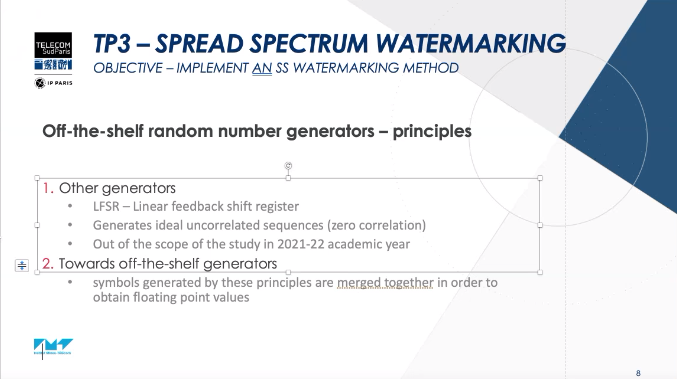
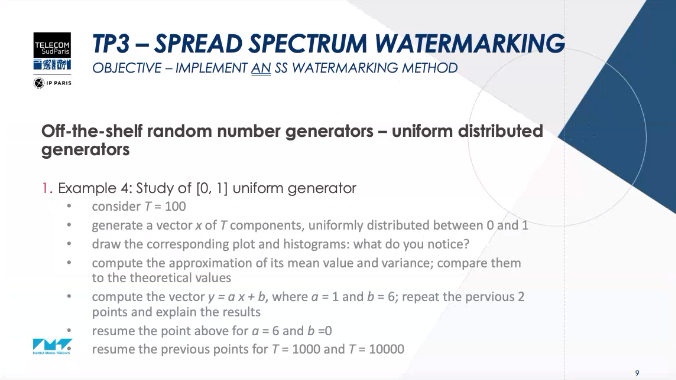

In [45]:
seq_uni = np.random.rand(100)

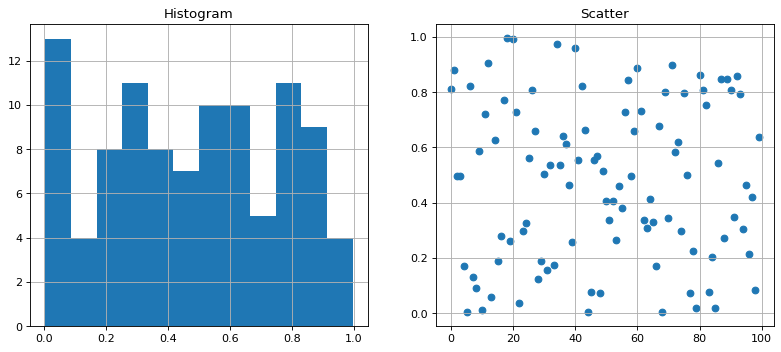

In [46]:
plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.hist(seq_uni, bins=12)
plt.title("Histogram")
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(range(100), seq_uni)
plt.title("Scatter")
plt.grid()

In [20]:
mean_seq_rand = np.mean(seq_rand)
var_seq_rand = np.var(seq_rand)